<h1 style='color:Blue'>Prediction</h1>

In [1]:
import torch
from models import ResNet50, mobilenet
from torchvision import transforms
from torch.utils.data import DataLoader

import PIL.Image
import numpy as np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
pretrained_model_path = "3dface_models/logs_mobileNet_v2_with_th_12-18.14-41/3dface-model.pkl"

In [4]:
input_channels = 4
num_of_classes = 83

In [5]:
model = mobilenet(input_channels, num_of_classes, pretrained=False)

In [6]:
model.load_state_dict(torch.load(pretrained_model_path, map_location=device))

<All keys matched successfully>

In [7]:
newmodel = torch.nn.Sequential(*(list(model.children())[:-1]))

In [8]:
model = newmodel.to(device)

In [9]:
criterion = torch.nn.CrossEntropyLoss()

In [10]:
model.eval()

Sequential(
  (0): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, trac

In [330]:
path = '3dface_train/01/'
rgb_image_path = path + '01_10.png'
dep_image_path = path + '01_10.npy'

In [331]:
fp = open(rgb_image_path,"rb")
image = PIL.Image.open(fp)

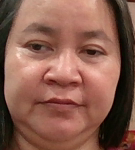

In [332]:
image

In [333]:
rgb_image = np.asarray(image)
dep_image = np.load(dep_image_path)
dep_image = np.expand_dims(dep_image, axis=-1)
image = np.concatenate((rgb_image, dep_image), axis=-1)

In [334]:
from dataset.RGBD_transforms import Resize

In [335]:
train_transform = transforms.Compose([
                    Resize(224),
                    transforms.ToTensor(),
                ])

In [336]:
tensor_RGBD = train_transform(image)

In [337]:
tensor_RGBD = tensor_RGBD.to(device)

In [338]:
tensor_RGBD

tensor([[[0.0008, 0.0007, 0.0005,  ..., 0.0011, 0.0011, 0.0012],
         [0.0007, 0.0007, 0.0005,  ..., 0.0011, 0.0011, 0.0011],
         [0.0006, 0.0006, 0.0005,  ..., 0.0010, 0.0010, 0.0011],
         ...,
         [0.0005, 0.0005, 0.0005,  ..., 0.0015, 0.0015, 0.0016],
         [0.0005, 0.0005, 0.0005,  ..., 0.0014, 0.0014, 0.0015],
         [0.0005, 0.0005, 0.0005,  ..., 0.0014, 0.0014, 0.0014]],

        [[0.0006, 0.0006, 0.0004,  ..., 0.0004, 0.0004, 0.0005],
         [0.0006, 0.0005, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
         [0.0005, 0.0005, 0.0004,  ..., 0.0004, 0.0004, 0.0004],
         ...,
         [0.0004, 0.0004, 0.0004,  ..., 0.0003, 0.0003, 0.0003],
         [0.0004, 0.0004, 0.0004,  ..., 0.0003, 0.0003, 0.0003],
         [0.0004, 0.0004, 0.0004,  ..., 0.0003, 0.0003, 0.0003]],

        [[0.0005, 0.0005, 0.0003,  ..., 0.0002, 0.0002, 0.0002],
         [0.0005, 0.0004, 0.0003,  ..., 0.0002, 0.0002, 0.0002],
         [0.0003, 0.0003, 0.0003,  ..., 0.0002, 0.0002, 0.

In [339]:
predictions = model(tensor_RGBD[None, ...])

In [340]:
predictions

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0165, 0.2259,  ..., 0.2988, 0.1976, 0.0000],
          [0.0000, 0.3533, 0.5038,  ..., 0.7184, 0.4646, 0.2914],
          ...,
          [0.0000, 0.1907, 0.3024,  ..., 0.8837, 0.6193, 0.6611],
          [0.0000, 0.1843, 0.3647,  ..., 0.8220, 0.4983, 0.3830],
          [0.0000, 0.0000, 0.0000,  ..., 0.2167, 0.0889, 0.0055]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [341]:
output = predictions[0].tolist()
output

[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.2736688554286957, 0.033603254705667496, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.13076619803905487, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.08659788221120834, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0,
   0.016526514664292336,
   0.2258611023426056,
   0.27163252234458923,
   0.29884472489356995,
   0.1976339966058731,
   0.0],
  [0.0,
   0.3532645106315613,
   0.5038036704063416,
   0.533629834651947,
   0.718376100063324,
   0.46462520956993103,
   0.29135894775390625],
  [0.05725235491991043,
   0.48811760544776917,
   0.7830011248588562,
   1.0478359460830688,
   1.371017575263977,
   0.8164552450180054,
   0.6913312673568726],
  [0.10372637212276459,
   0.42432326078414917,
   0.8078668117523193,
   1.0175631046295166,
   1.3240344524383545,
   0.8649718761444092

In [342]:
import json

# open output file for writing
with open('listfile.txt', 'w') as filehandle:
    json.dump(output, filehandle)

In [343]:
with open('listfile.txt', 'r') as filehandle:
    basicList = json.load(filehandle)

In [344]:
basicList

[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.2736688554286957, 0.033603254705667496, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.13076619803905487, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.08659788221120834, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0,
   0.016526514664292336,
   0.2258611023426056,
   0.27163252234458923,
   0.29884472489356995,
   0.1976339966058731,
   0.0],
  [0.0,
   0.3532645106315613,
   0.5038036704063416,
   0.533629834651947,
   0.718376100063324,
   0.46462520956993103,
   0.29135894775390625],
  [0.05725235491991043,
   0.48811760544776917,
   0.7830011248588562,
   1.0478359460830688,
   1.371017575263977,
   0.8164552450180054,
   0.6913312673568726],
  [0.10372637212276459,
   0.42432326078414917,
   0.8078668117523193,
   1.0175631046295166,
   1.3240344524383545,
   0.8649718761444092

In [345]:
array_output_2 = np.array(basicList)
array_output_2

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.01652651, 0.2258611 , ..., 0.29884472,
         0.197634  , 0.        ],
        [0.        , 0.35326451, 0.50380367, ..., 0.7183761 ,
         0.46462521, 0.29135895],
        ...,
        [0.        , 0.19072583, 0.30240318, ..., 0.88369262,
         0.61929667, 0.66109508],
        [0. 

In [346]:
dist = np.linalg.norm(array_output_2 - array_output_3)

In [347]:
dist

18.764213492933763

In [38]:
path = '3dface_th_align/annieanne/'
rgb_image_path = path + 'annieanne2_1.png'
dep_image_path = path + 'annieanne2_1.npy'

In [39]:
path = '3dface_th_align/bietheska/'
rgb_image_path = path + 'bietheska2_0.png'
dep_image_path = path + 'bietheska2_0.npy'

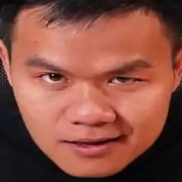

In [41]:
fp = open(rgb_image_path,"rb")
image = PIL.Image.open(fp)
image